In [10]:
from pydub import AudioSegment
import numpy as np

In [12]:
import numpy as np
import wave

def generate_noisy_wav(output_file, duration_seconds=10, noise_amplitude=0.5):
    # Samplingrate und Anzahl der Samples pro Sekunde festlegen
    sample_rate = 44100
    num_samples = int(duration_seconds * sample_rate)

    # Zeitvektor erstellen
    t = np.linspace(0, duration_seconds, num_samples, endpoint=False)

    # Lautstärke des Rauschens festlegen
    noise = noise_amplitude * np.random.normal(size=num_samples)

    # Audio-Signal erstellen
    audio_signal = (noise * 32767).astype(np.int16)

    # WAV-Datei erstellen
    with wave.open(output_file, 'w') as wave_file:
        wave_file.setnchannels(1)  # Mono
        wave_file.setsampwidth(2)  # 16-bit
        wave_file.setframerate(sample_rate)
        wave_file.writeframes(audio_signal.tobytes())

# Beispielaufruf
generate_noisy_wav("noisy_audio.wav", duration_seconds=10, noise_amplitude=0.5)

In [14]:
import numpy as np
import wave

def generate_noisy_wav_with_pause(output_file, duration_seconds=10, noise_amplitude=0.5, pause_duration=1):
    # Samplingrate und Anzahl der Samples pro Sekunde festlegen
    sample_rate = 44100
    num_samples = int(duration_seconds * sample_rate)

    # Zeitvektor erstellen
    t = np.linspace(0, duration_seconds, num_samples, endpoint=False)

    # Lautstärke des Rauschens festlegen
    noise = noise_amplitude * np.random.normal(size=num_samples)

    # Audio-Signal erstellen
    audio_signal = (noise * 32767).astype(np.int16)

    # Stille hinzufügen (Pause)
    pause_samples = int(pause_duration * sample_rate)
    audio_signal = np.concatenate([audio_signal[:pause_samples], np.zeros(sample_rate), audio_signal[pause_samples:]])

    # WAV-Datei erstellen
    with wave.open(output_file, 'w') as wave_file:
        wave_file.setnchannels(1)  # Mono
        wave_file.setsampwidth(2)  # 16-bit
        wave_file.setframerate(sample_rate)
        wave_file.writeframes(audio_signal.tobytes())

# Beispielaufruf
generate_noisy_wav_with_pause("noisy_audio_with_pause.wav", duration_seconds=10, noise_amplitude=0.5, pause_duration=1)

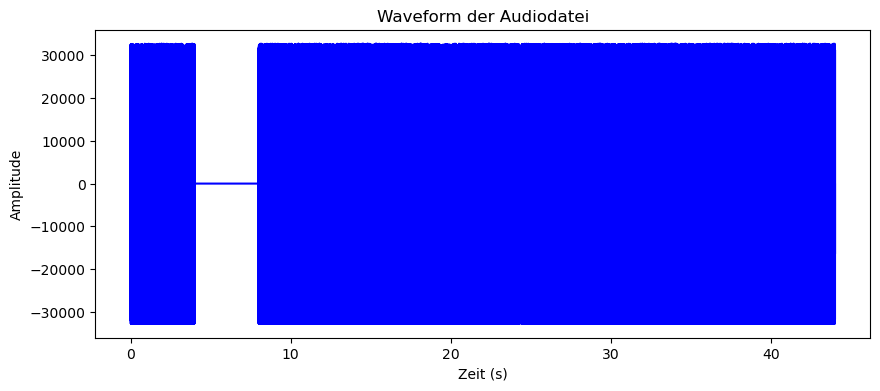

In [17]:
import wave
import numpy as np
import matplotlib.pyplot as plt

def plot_wav_volume(wav_file):
    # WAV-Datei einlesen
    with wave.open(wav_file, 'rb') as wave_file:
        # Die Anzahl der Frames (Samples) und die Samplerate erhalten
        num_frames = wave_file.getnframes()
        sample_rate = wave_file.getframerate()

        # Die gesamte Audiodatei als Numpy-Array lesen
        audio_signal = np.frombuffer(wave_file.readframes(num_frames), dtype=np.int16)

    # Zeitvektor erstellen
    t = np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal))

    # Plot erstellen
    plt.figure(figsize=(10, 4))
    plt.plot(t, audio_signal, color='b')
    plt.title('Waveform der Audiodatei')
    plt.xlabel('Zeit (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Beispielaufruf (ersetze "dein_audio.wav" durch den Pfad zu deiner WAV-Datei)
plot_wav_volume("noisy_audio_with_pause.wav")